In [8]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('predictive_maintenance_MV.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     9948 non-null   object 
 3   Air temperature [K]      9986 non-null   float64
 4   Process temperature [K]  9858 non-null   float64
 5   Rotational speed [rpm]   9881 non-null   float64
 6   Torque [Nm]              9960 non-null   float64
 7   Tool wear [min]          9840 non-null   float64
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 781.4+ KB


In [ ]:
#checking for duplicates
df.duplicated().sum()

### No duplicate values in the data

In [6]:
#renaming columns for easier execution

df.rename(columns = {'Air temperature [K]': 'Air_temperature', 
                              'Process temperature [K]': 'Process_temperature', 
                              'Rotational speed [rpm]': 'Rotational_speed', 
                              'Torque [Nm]': 'Torque', 
                              'Tool wear [min]': 'Tool_wear',
                    'Failure Type': 'Failure_Type'}, inplace = True)

In [7]:
#dropping UDI and Product ID columms as they are not needed for analysis and will not add any value to it.
df.drop(['UDI', 'Product ID'], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9948 non-null   object 
 1   Air_temperature      9986 non-null   float64
 2   Process_temperature  9858 non-null   float64
 3   Rotational_speed     9881 non-null   float64
 4   Torque               9960 non-null   float64
 5   Tool_wear            9840 non-null   float64
 6   Target               10000 non-null  int64  
 7   Failure_Type         10000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


In [9]:
#Checking for missing values
df.isna().sum()

Type                    52
Air_temperature         14
Process_temperature    142
Rotational_speed       119
Torque                  40
Tool_wear              160
Target                   0
Failure_Type             0
dtype: int64

In [14]:
(df.isna().sum()/len(df)*100).sort_values(ascending = False)

Tool wear [min]            1.60
Process temperature [K]    1.42
Rotational speed [rpm]     1.19
Type                       0.52
Torque [Nm]                0.40
Air temperature [K]        0.14
UDI                        0.00
Product ID                 0.00
Target                     0.00
Failure Type               0.00
dtype: float64

# Missing Value Treatment

In [11]:
df.describe()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
count,9986.000000,9858.000000,9881.000000,9960.000000,9840.000000,10000.000000
mean,300.007180,310.021830,1538.526870,39.981024,107.888720,0.033900
std,2.000756,1.484913,179.093066,9.973028,63.696342,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1611.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [12]:
#imputing the missing values with the mean
df['Tool_wear'] = df['Tool_wear'].fillna(df['Tool_wear'].mean())
df['Process_temperature'] = df['Process_temperature'].fillna(df['Process_temperature'].mean())
df['Rotational_speed'] = df['Rotational_speed'].fillna(df['Rotational_speed'].mean())
df['Torque'] = df['Torque'].fillna(df['Torque'].mean())
df['Air_temperature'] = df['Air_temperature'].fillna(df['Air_temperature'].mean())

In [13]:
pd.value_counts(df.Type)

L    5969
M    2979
H    1000
Name: Type, dtype: int64

In [14]:
#imputing the value in categorical variable with the most frequently occuring value
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

In [15]:
df.isna().sum()

Type                   0
Air_temperature        0
Process_temperature    0
Rotational_speed       0
Torque                 0
Tool_wear              0
Target                 0
Failure_Type           0
dtype: int64

### No missing values left

In [16]:
df.describe()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.007180,310.021830,1538.526870,39.981024,107.888720,0.033900
std,1.999355,1.474332,178.024166,9.953060,63.184665,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1424.000000,33.200000,54.000000,0.000000
50%,300.100000,310.100000,1505.000000,40.000000,107.888720,0.000000
75%,301.500000,311.100000,1610.000000,46.700000,161.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [17]:
df.describe(include='object')

,Type,Failure_Type
count,10000,10000
unique,3,6
top,L,No Failure
freq,6021,9652


In [18]:
#changing the data type of Target variable to string
df['Target'] = df['Target'].apply(str)

In [19]:
df.dtypes

Type                    object
Air_temperature        float64
Process_temperature    float64
Rotational_speed       float64
Torque                 float64
Tool_wear              float64
Target                  object
Failure_Type            object
dtype: object

In [20]:
print(df['Type'].value_counts())
print(df['Target'].value_counts())
print(df['Failure_Type'].value_counts())

L    6021
M    2979
H    1000
Name: Type, dtype: int64
0    9661
1     339
Name: Target, dtype: int64
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure_Type, dtype: int64


In [21]:
#importing data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

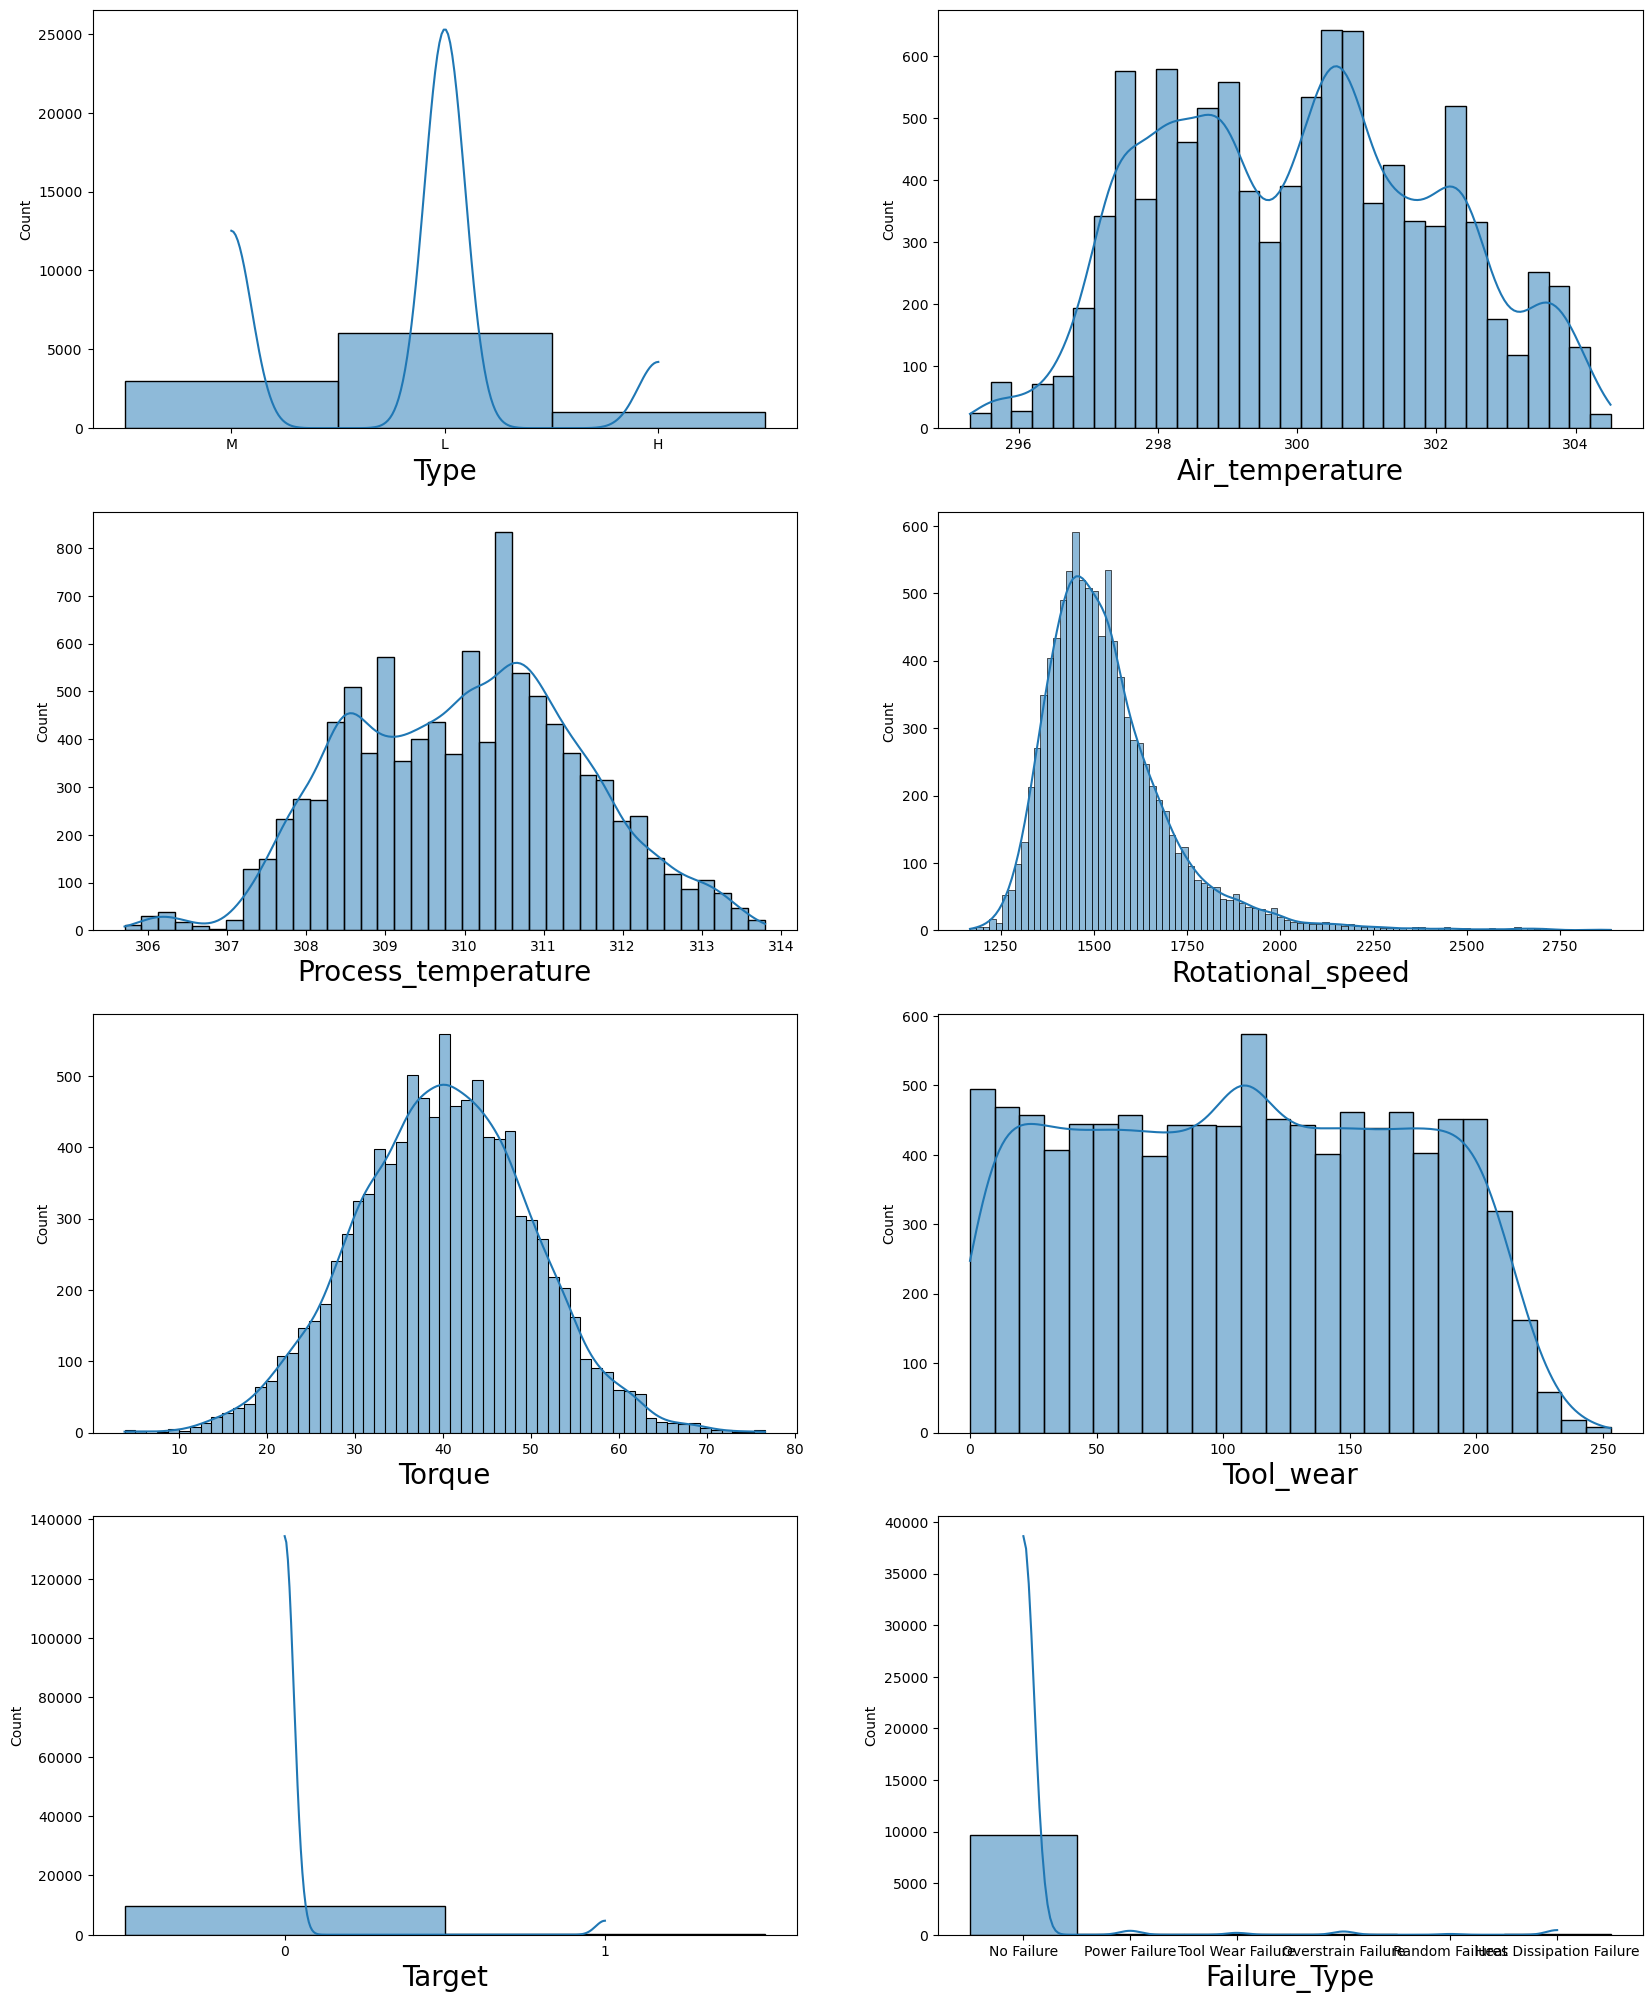

In [22]:
# Univariate Analysis - Checking the overall distribution of all variables
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=8 :     # as there are 8 columns in the data
        ax = plt.subplot(4,2,plotnumber)# plotting 8 graphs (5-rows,2-columns) ,plotnumber is for count  
        sn.histplot(x=df[column], kde=True) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

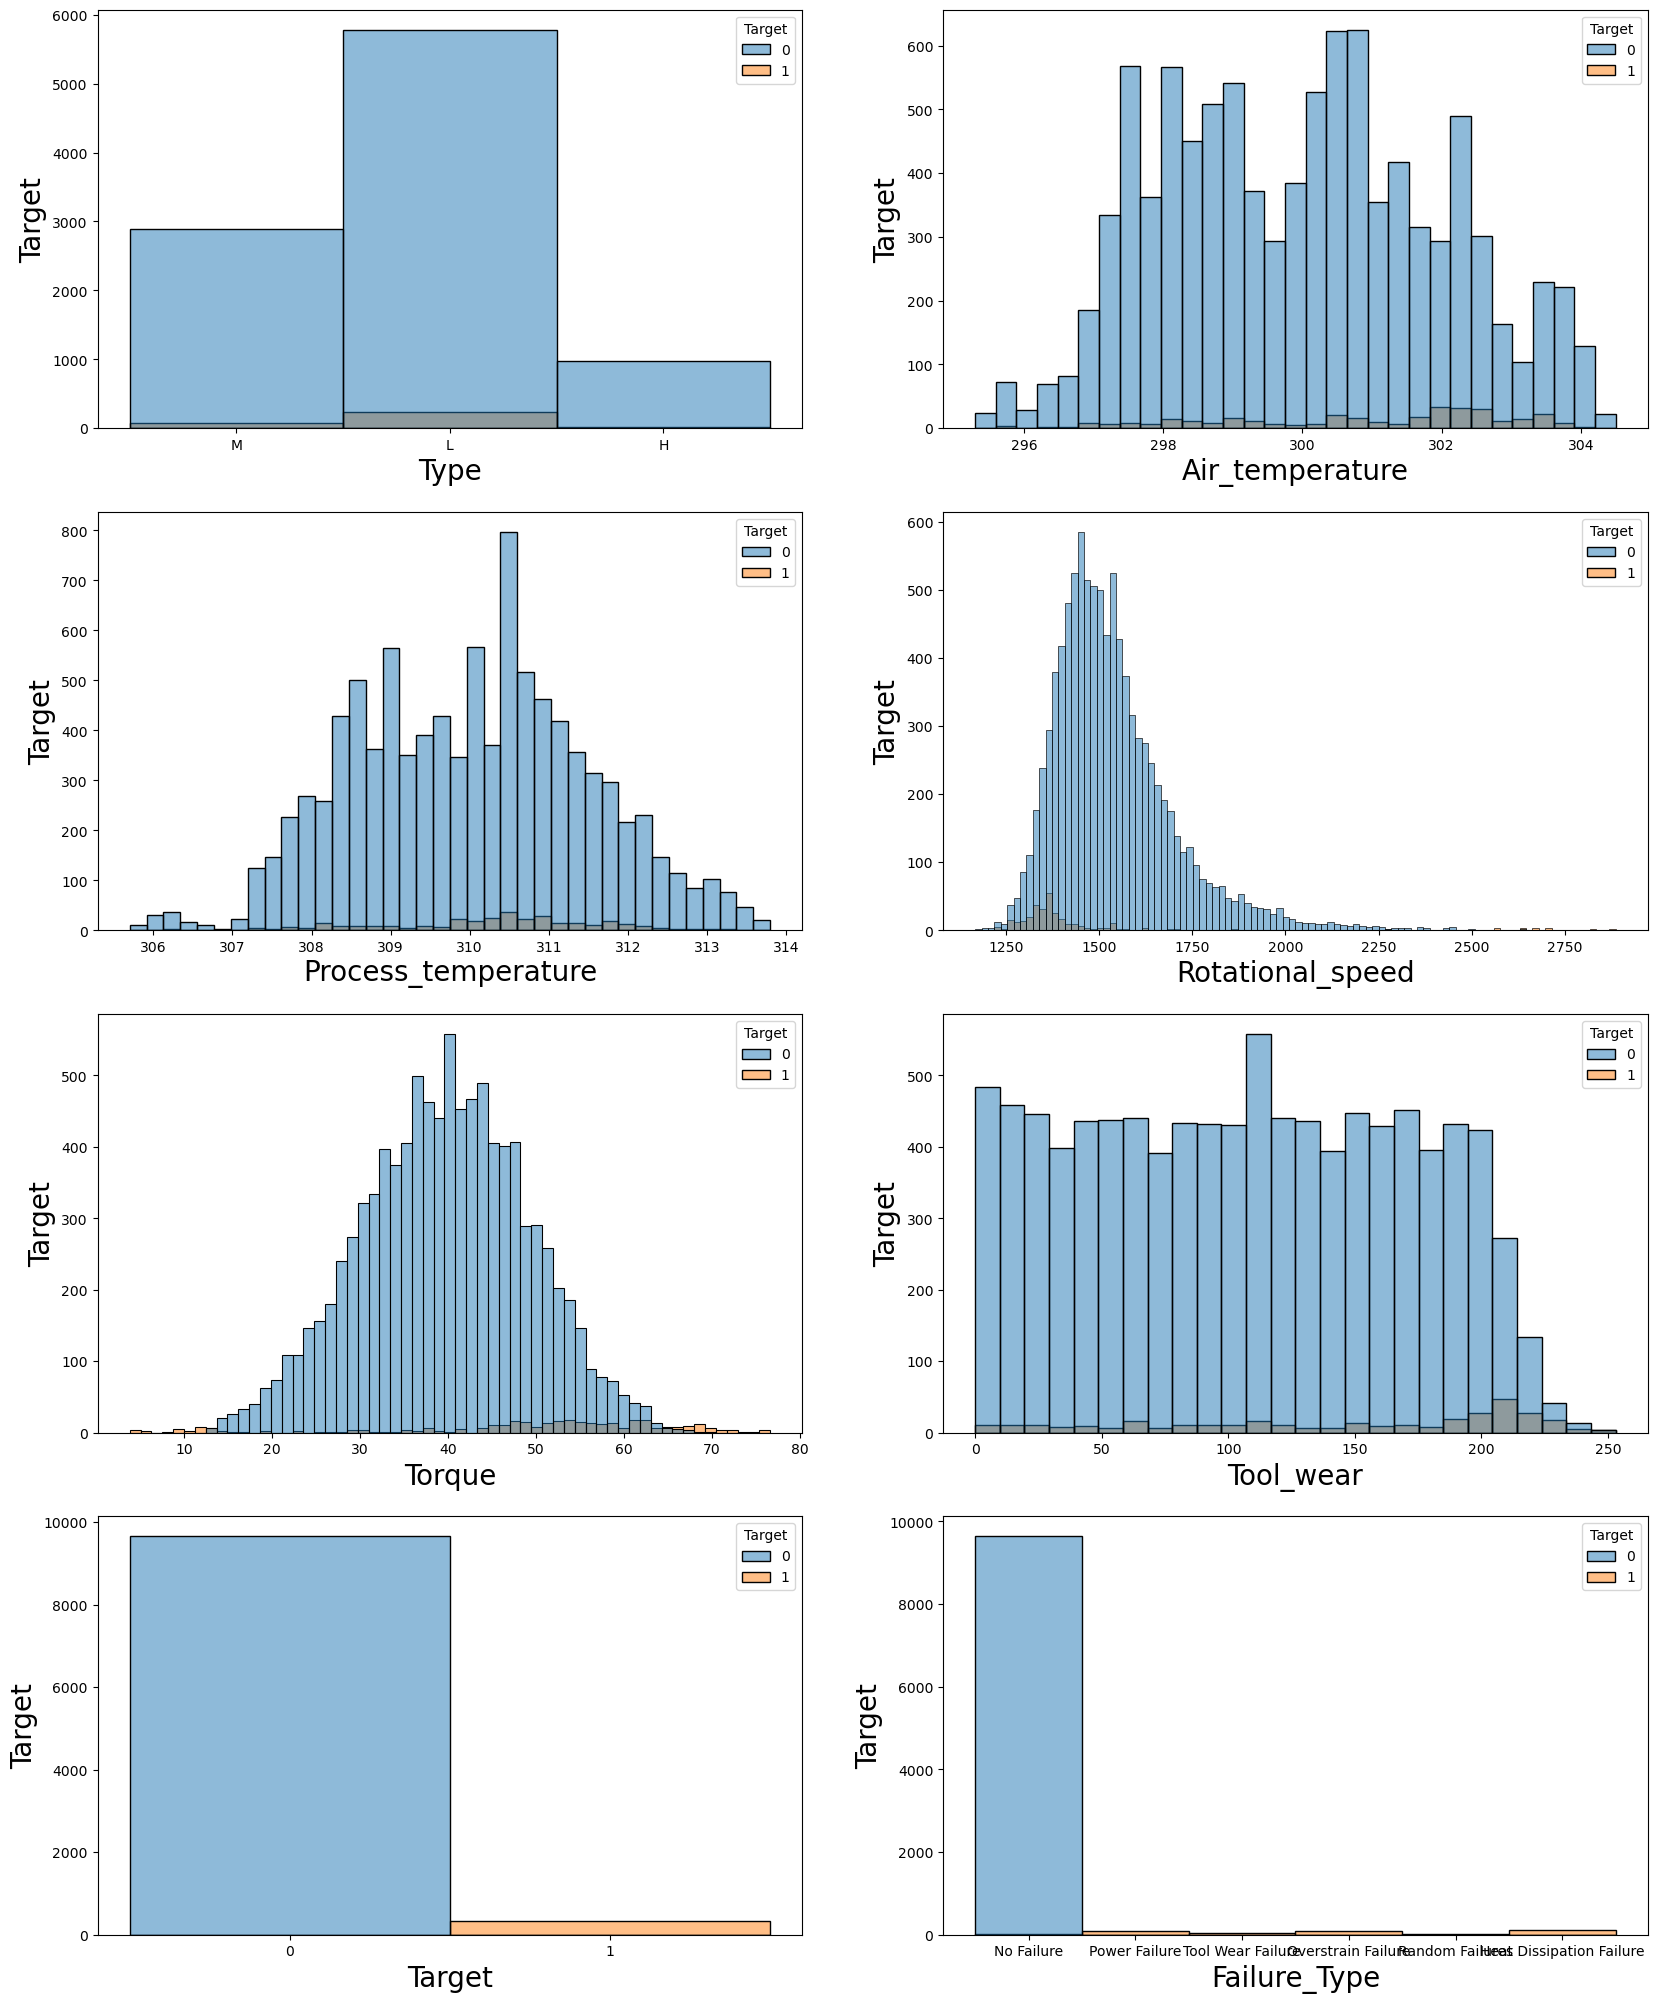

In [23]:
#Bivariate analysis
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=8 :     # as there are 8 columns in the data
        ax = plt.subplot(4,2,plotnumber)# plotting 8 graphs (5-rows,2-columns) ,plotnumber is for count  
        sn.histplot(x=df[column],hue=df.Target) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('Target',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

In [24]:
df_num = df.drop(['Type', 'Target','Failure_Type'], axis = 1)
df_num.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,298.1,308.6,1551.0,42.8,0.0
1,298.2,308.7,1408.0,46.3,3.0
2,298.1,308.5,1498.0,49.4,5.0
3,298.2,308.6,1433.0,39.5,7.0
4,298.2,308.7,1408.0,40.0,9.0


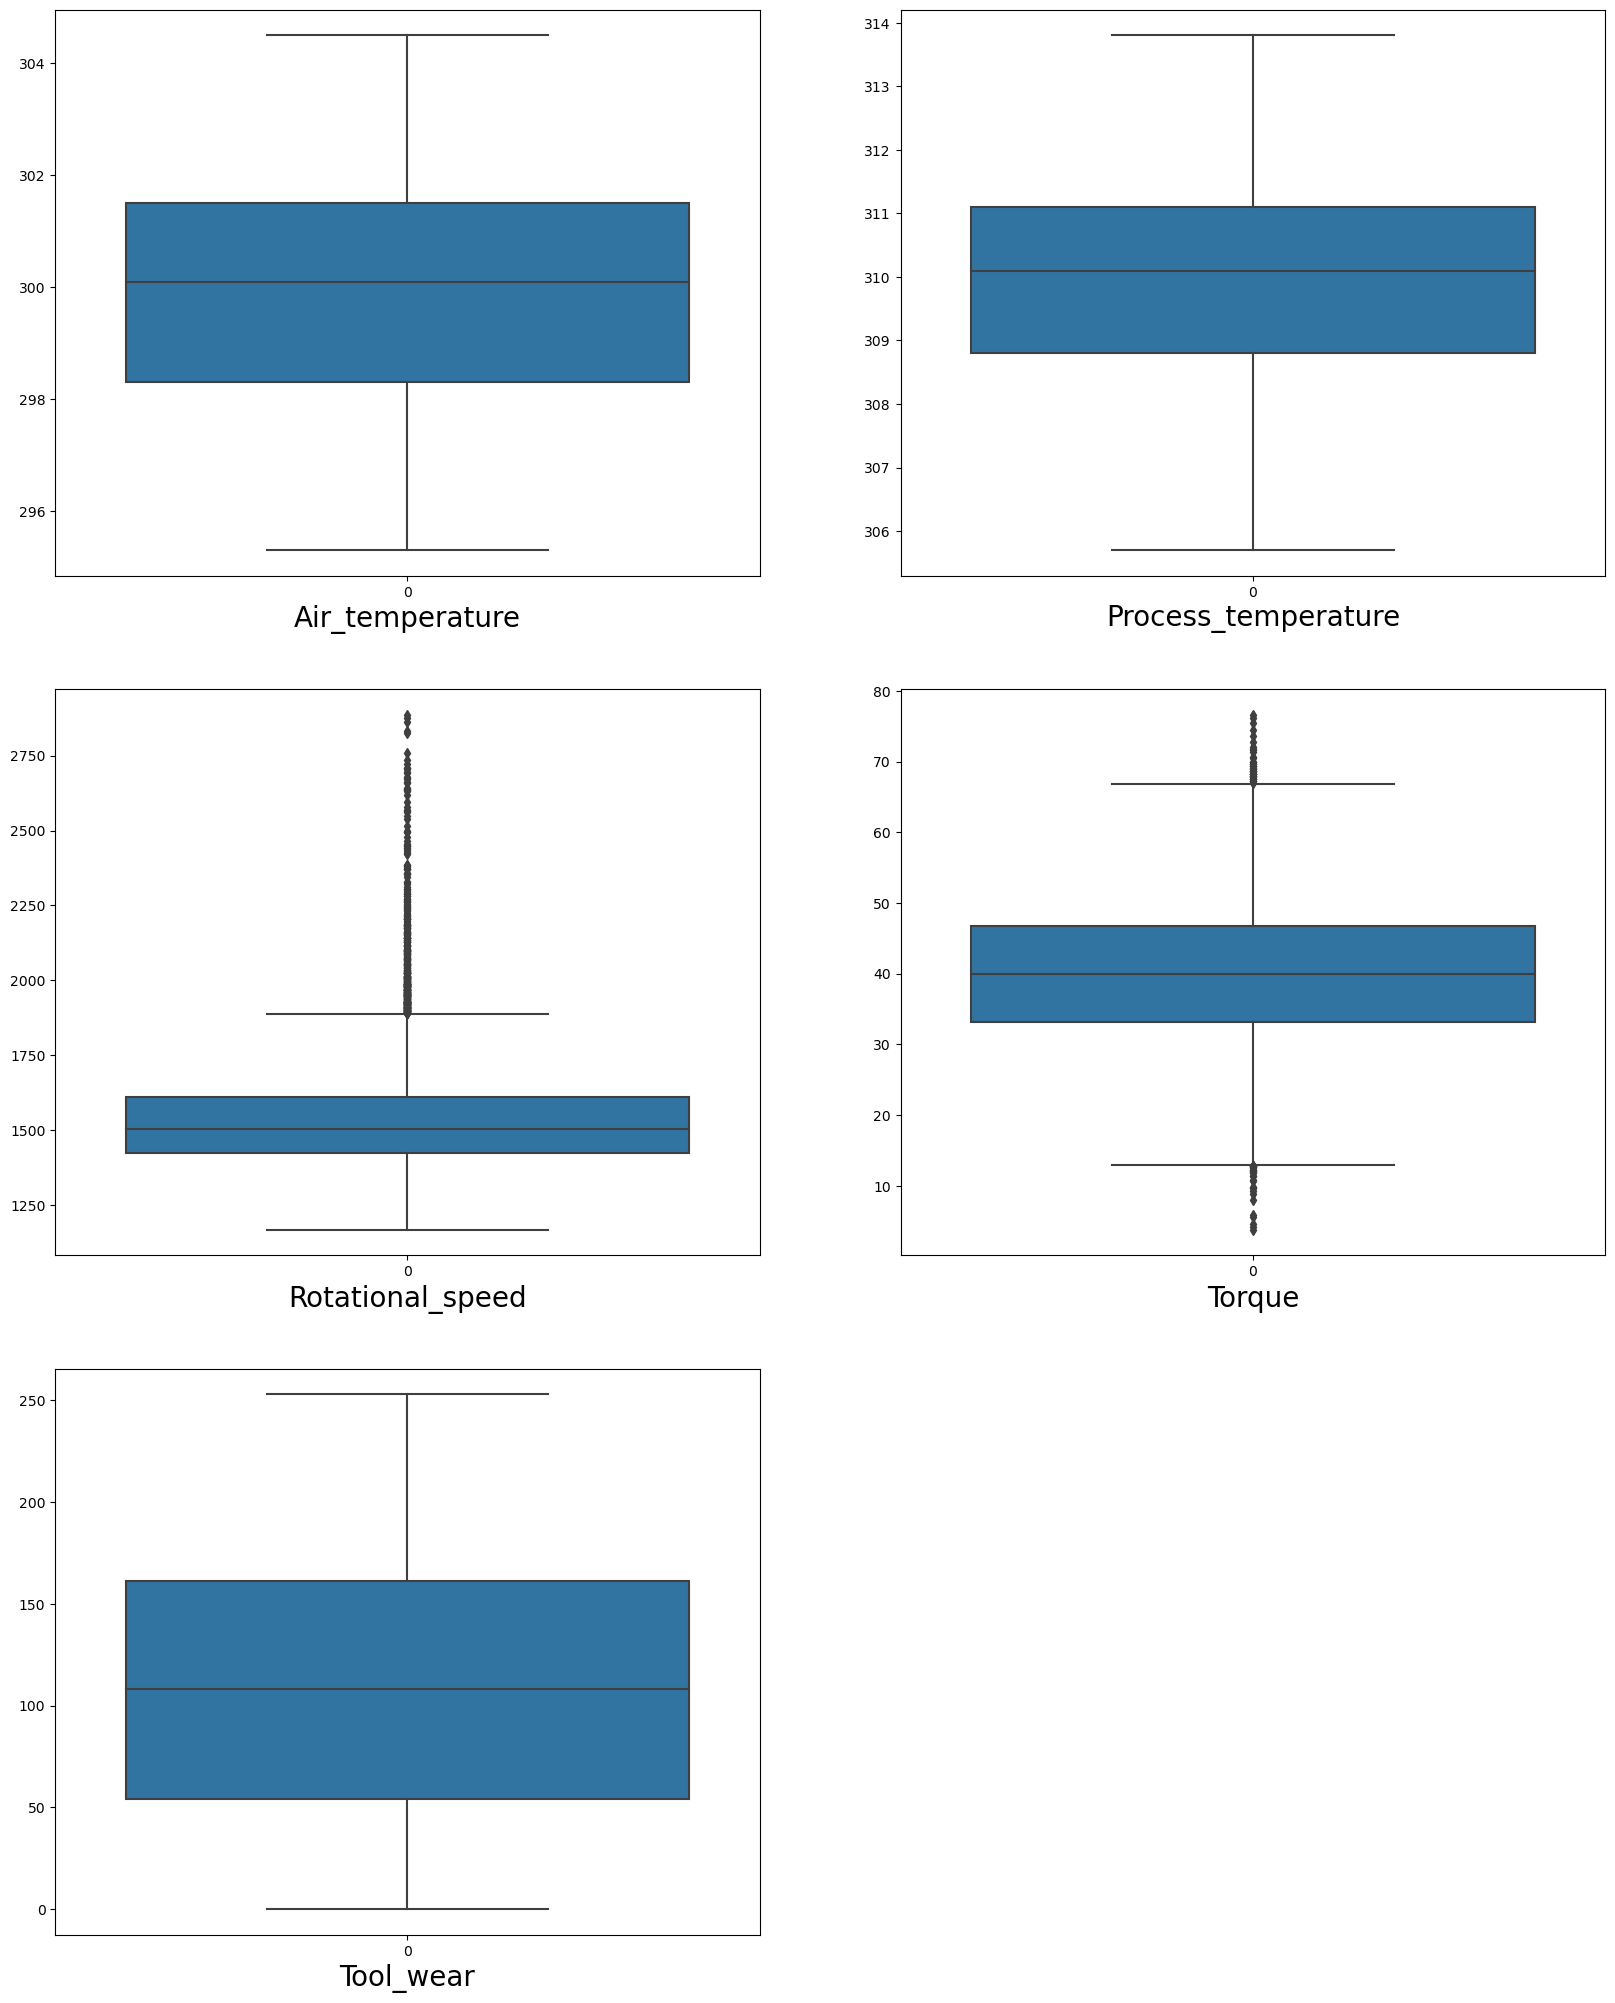

In [25]:
# let's see how data is distributed for every numerical column and check for outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1#counter

for column in df_num:#columns form data1
    if plotnumber<=5 :#checking whether plot number is less or equal to 5
        ax = plt.subplot(3,2,plotnumber)# 
        sn.boxplot(df_num[column])# ploting boxplot fo outlier 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

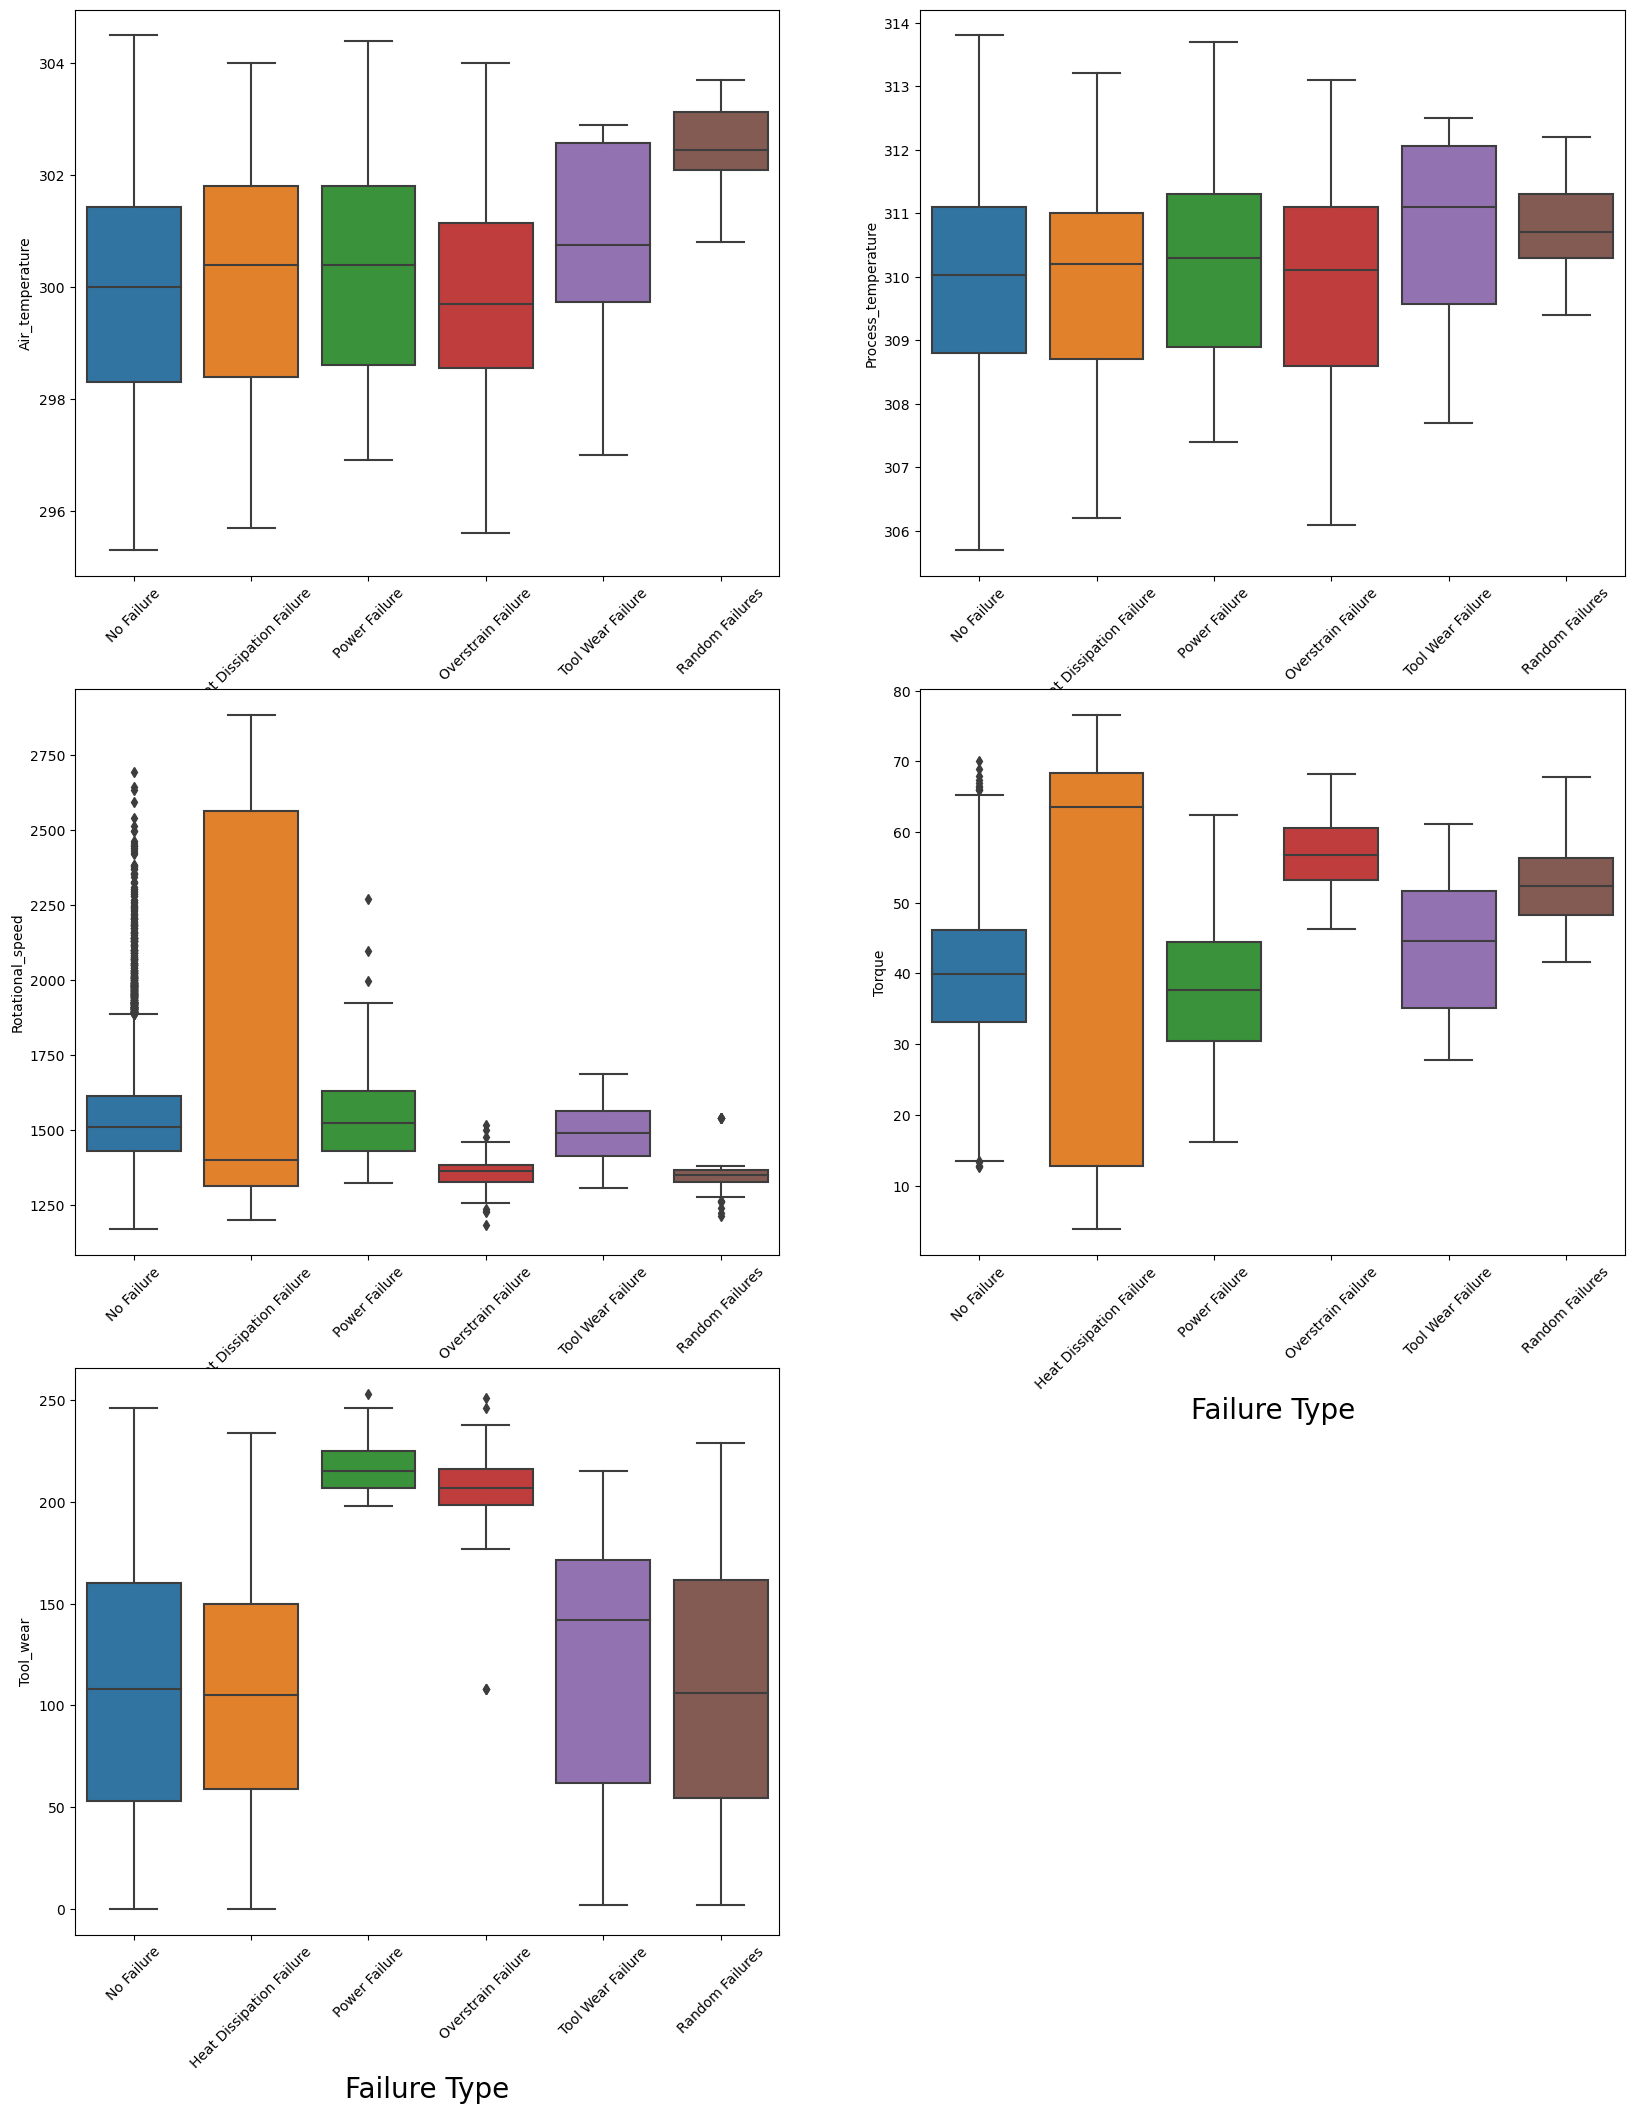

In [26]:
# let's see how data is distributed for every numerical column for every Failure Type and check for outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1#counter

for column in df_num:#columns form data1
    if plotnumber<=5 :#checking whether plot number is less or equal to 5
        ax = plt.subplot(3,2,plotnumber)# 
        sn.boxplot(y = df_num[column], x = 'Failure_Type', data = df)# ploting boxplot fo outlier 
        plt.xlabel('Failure Type',fontsize=20)
        
        ax.set_xticklabels(['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure','Random Failures'],
                           rotation=45)
        
    plotnumber+=1
plt.show()

# Outlier Treatment

In [27]:
# finding the upper and lower fence value of Rotational Speed to treat outliers
q1_rot_sd, q3_rot_sd = np.percentile(df['Rotational_speed'],[25, 75])
print(q1_rot_sd, q3_rot_sd)
iqr_rot_sd = q3_rot_sd - q1_rot_sd
print(iqr_rot_sd)
lower_fence_rot_sd = q1_rot_sd - (1.5*iqr_rot_sd)
upper_fence_rot_sd = q3_rot_sd + (1.5*iqr_rot_sd)
print(lower_fence_rot_sd, upper_fence_rot_sd)

1424.0 1610.0
186.0
1145.0 1889.0


In [28]:
# finding the upper and lower fence value of Torque to treat outliers
q1_torque, q3_torque = np.percentile(df['Torque'],[25, 75])
print(q1_torque, q3_torque)
iqr_torque = q3_torque - q1_torque
print(iqr_torque)
lower_fence_torque = q1_torque - (1.5*iqr_torque)
upper_fence_torque = q3_torque + (1.5*iqr_torque)
print(lower_fence_torque, upper_fence_torque)

33.2 46.7
13.5
12.950000000000003 66.95


In [29]:
df.Rotational_speed.loc[df.Rotational_speed > 1900]= 1900

In [30]:
df.Torque.loc[df.Torque > 70]= 70

In [31]:
df.Torque.loc[df.Torque < 10]= 10

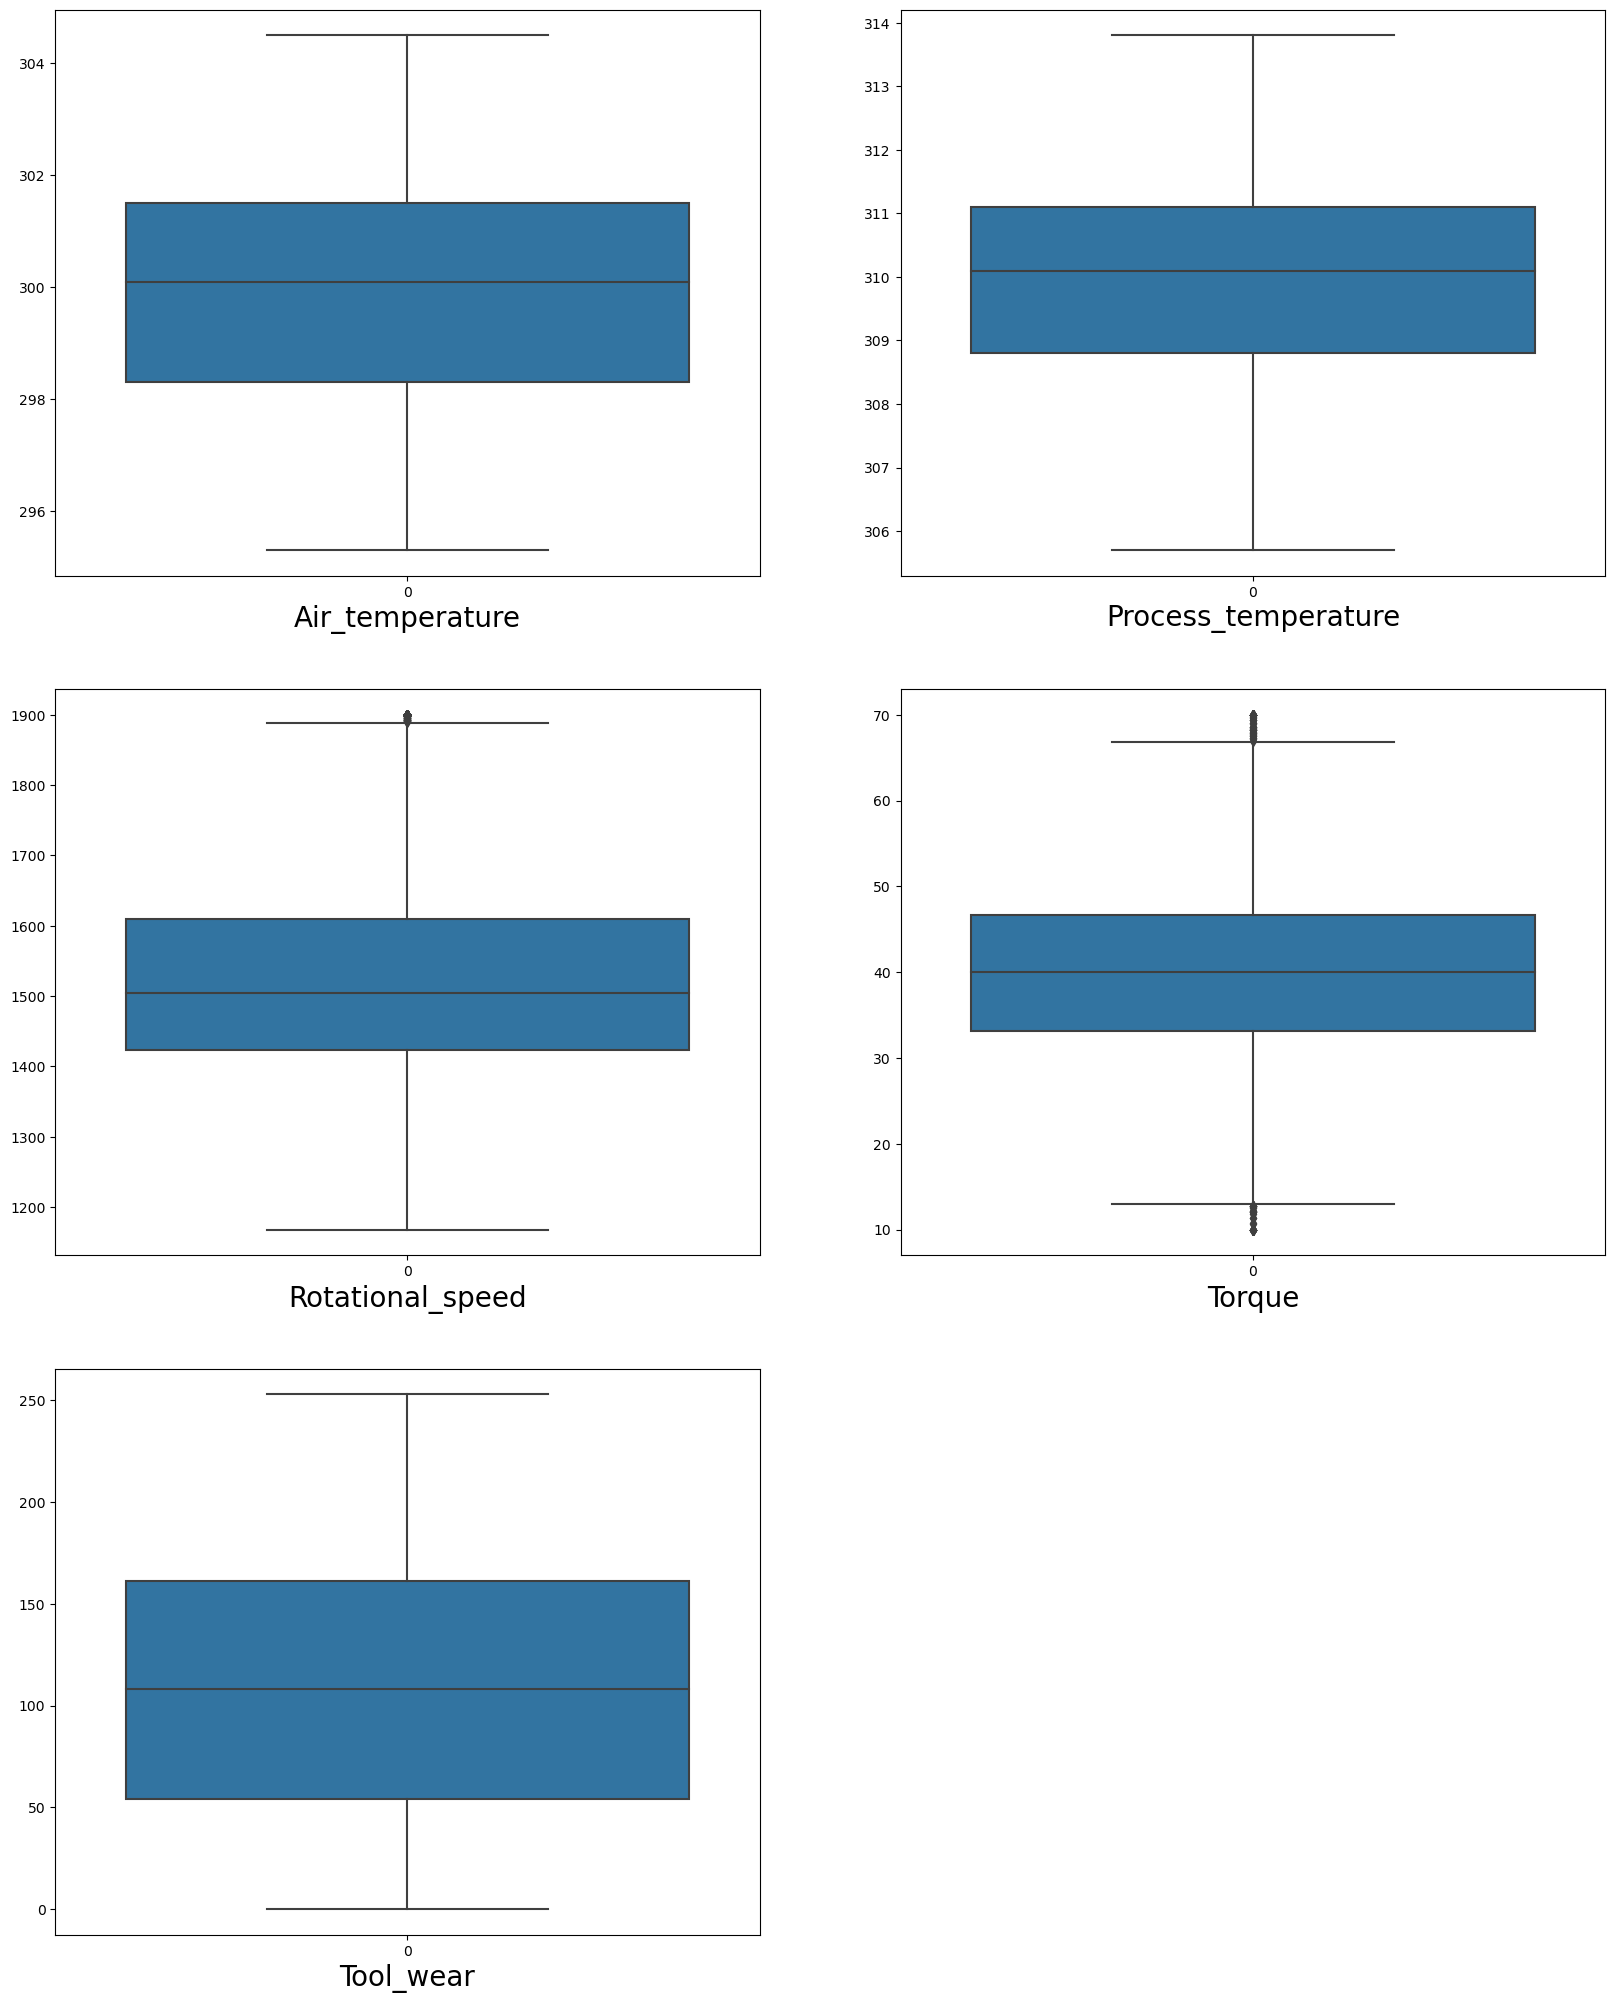

In [32]:
df_num1 = df.drop(['Type', 'Target','Failure_Type'], axis = 1)

# let's see how data is distributed for every numerical column and check for outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1#counter

for column in df_num1:#columns form data1
    if plotnumber<=5 :#checking whether plot number is less or equal to 5
        ax = plt.subplot(3,2,plotnumber)# 
        sn.boxplot(df_num1[column])# ploting boxplot fo outlier 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

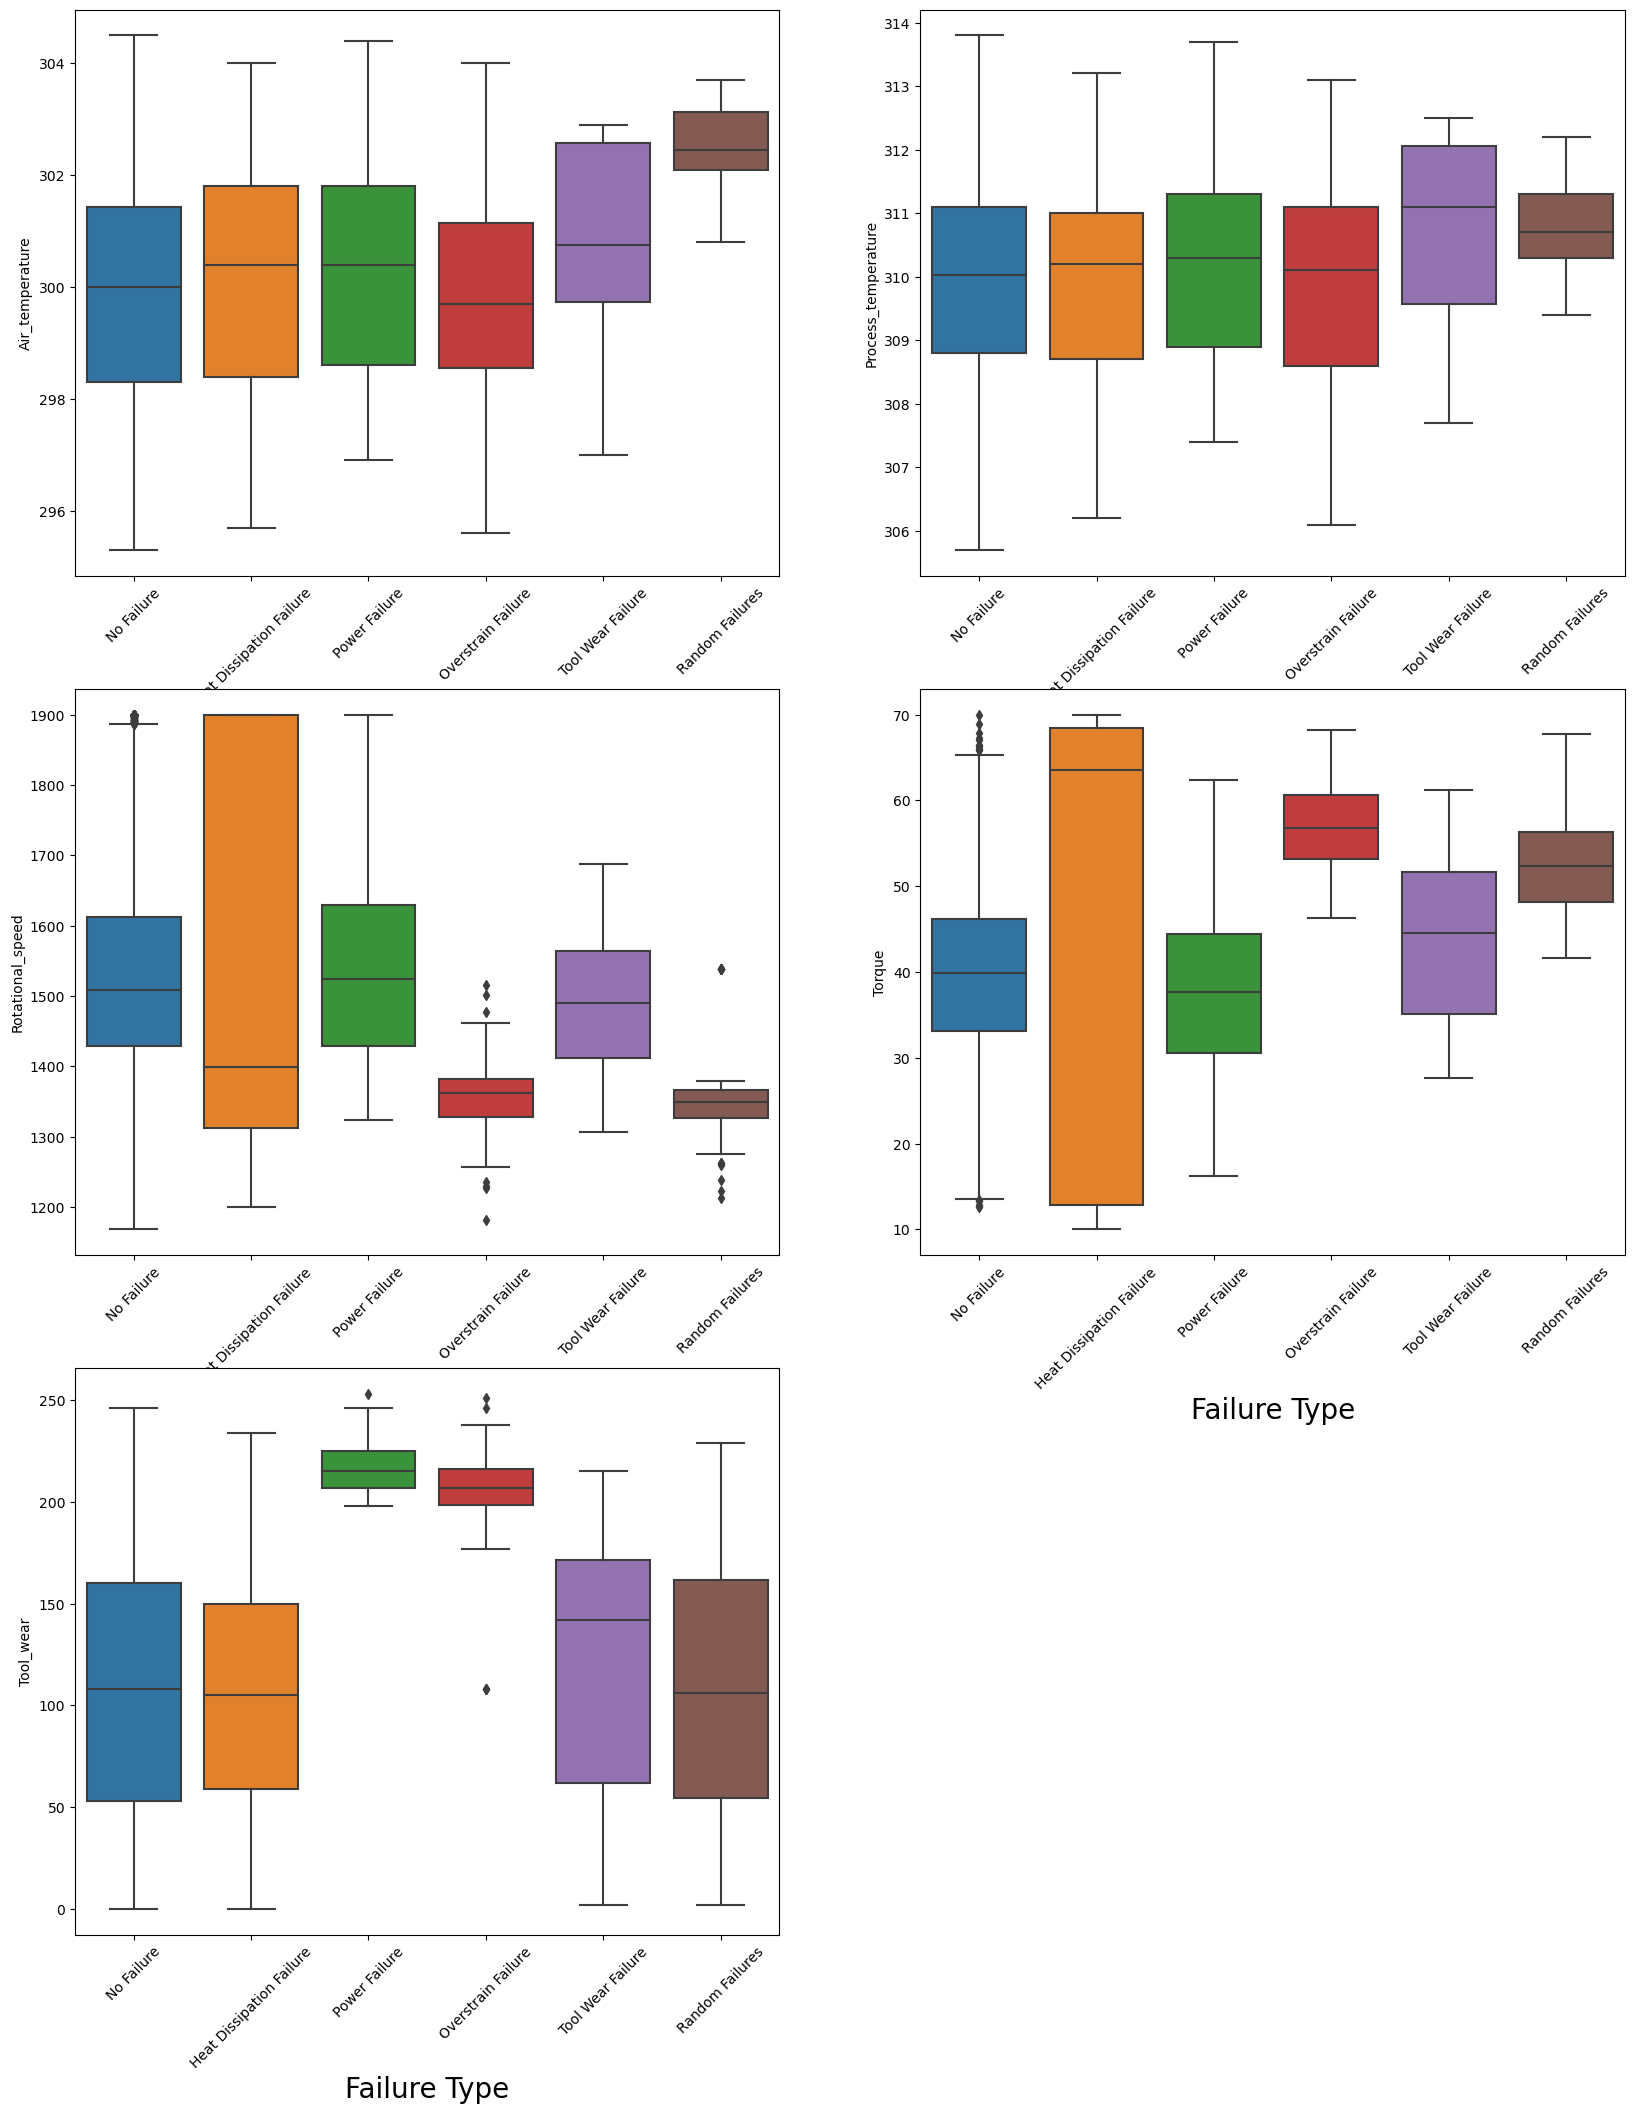

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1#counter

for column in df_num1:#columns form data1
    if plotnumber<=5 :#checking whether plot number is less or equal to 5
        ax = plt.subplot(3,2,plotnumber)# 
        sn.boxplot(y = df_num1[column], x = 'Failure_Type', data = df)# ploting boxplot fo outlier 
        plt.xlabel('Failure Type',fontsize=20)
        
        ax.set_xticklabels(['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure','Random Failures'],
                           rotation=45)
        
    plotnumber+=1
plt.show()

# Checking Correlation

<Axes: >

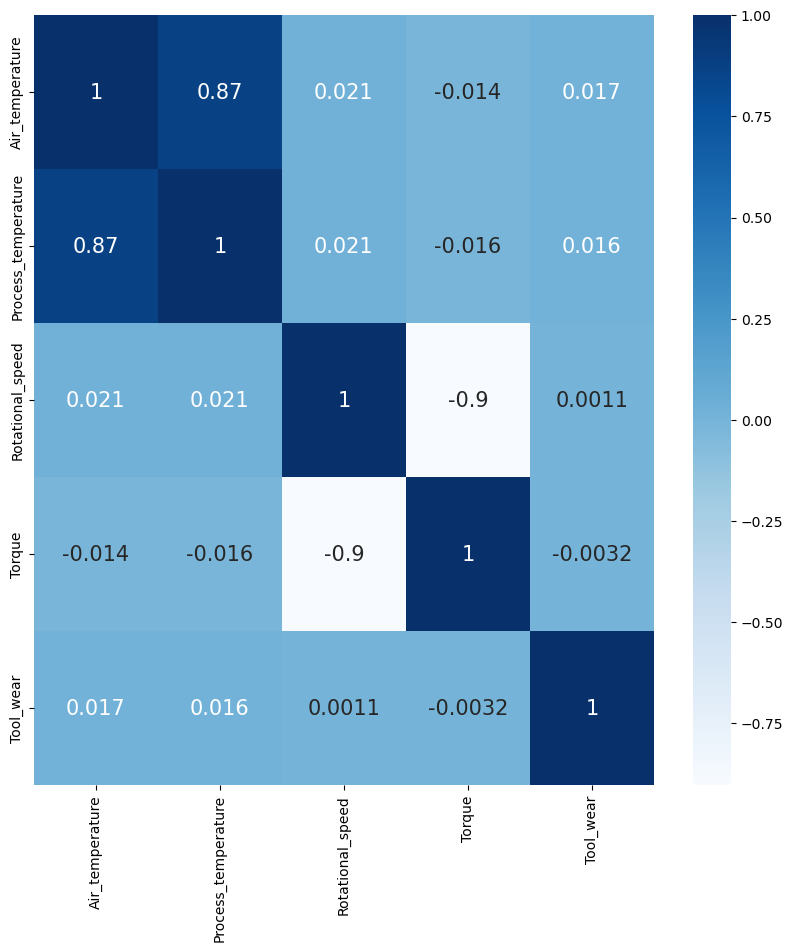

In [34]:
plt.figure(figsize=(10, 10))#canvas size
sn.heatmap(df_num1.corr(), annot=True, cmap="Blues", annot_kws={"size":15})#plotting heat map to check correlation

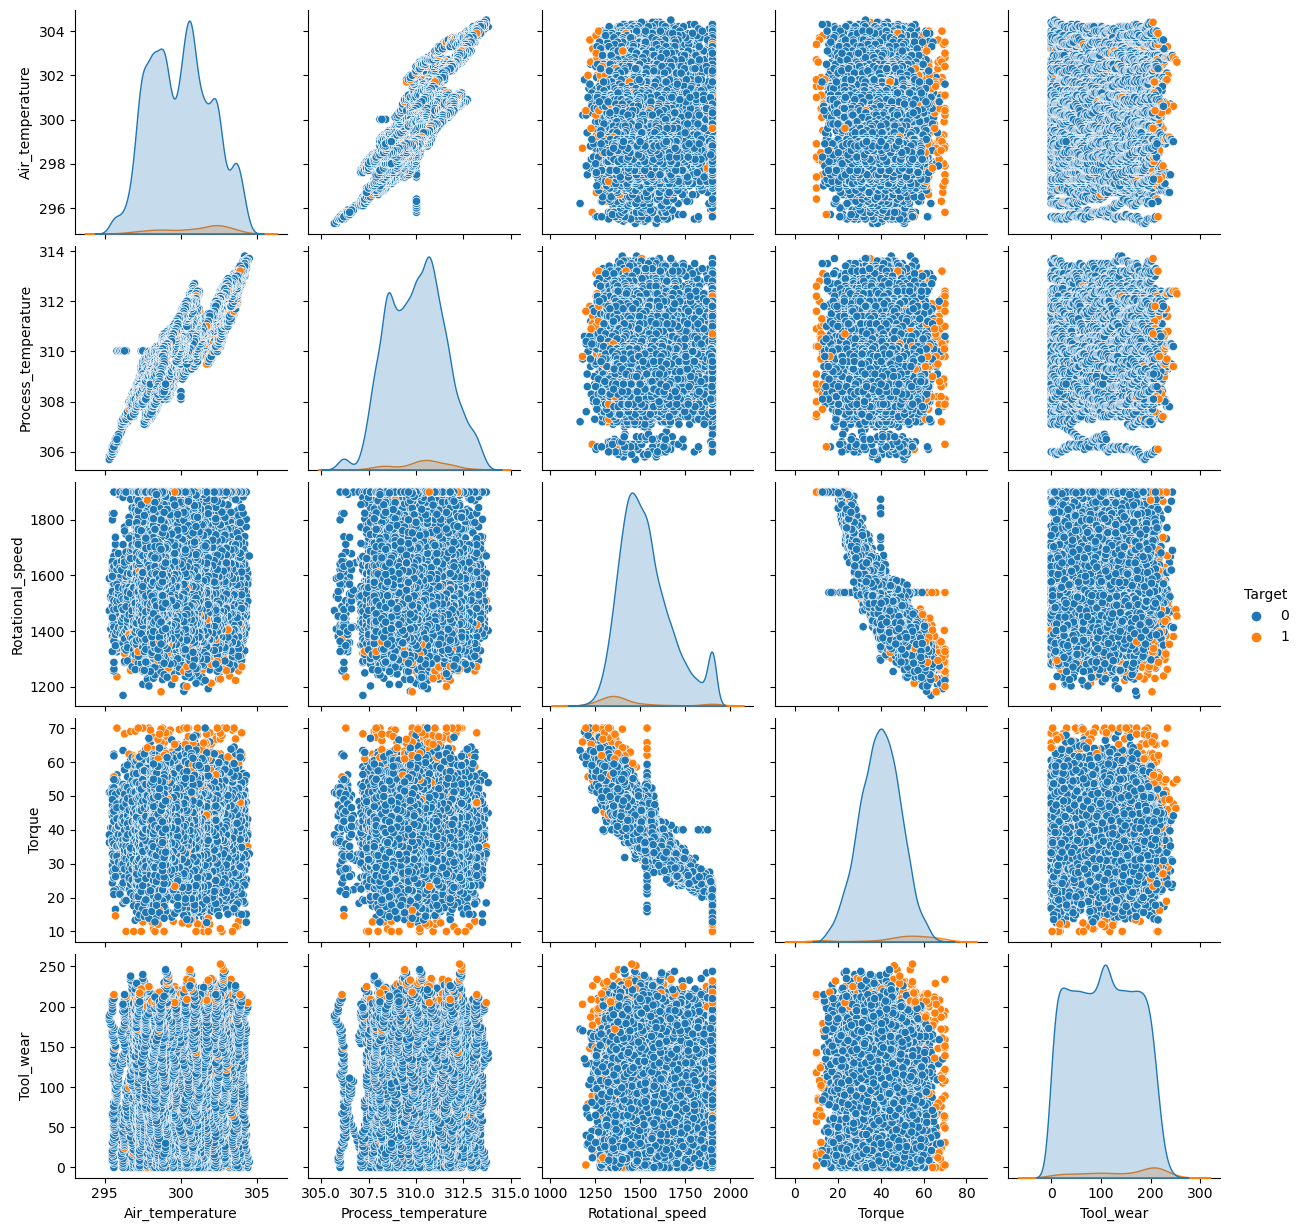

In [35]:
sn.pairplot(df, hue = 'Target')

# Checking for Multicollinearity

In [36]:
#Since there is high correlation between Air Temperature and Process Temperature and between Rotational Speed and and Torque,
# checl for multicollinearity using Variance Inflation Factor (VIF)
matcorr = df_num1.corr()
vif = pd.Series(np.linalg.inv(matcorr.to_numpy()).diagonal(), index=df_num1.columns, name='vif' )
vif.reset_index()

,index,vif
0,Air_temperature,4.138383
1,Process_temperature,4.137689
2,Rotational_speed,5.392982
3,Torque,5.391821
4,Tool_wear,1.000330


### Since the VIF is not very high between variables, these variables are independent and multicollinearity is not present

# Model Building using Dependent Variable as Target

In [37]:
df1 = df.drop(['Failure_Type'], axis = 1)
df1.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
0,M,298.1,308.6,1551.0,42.8,0.0,0
1,L,298.2,308.7,1408.0,46.3,3.0,0
2,L,298.1,308.5,1498.0,49.4,5.0,0
3,L,298.2,308.6,1433.0,39.5,7.0,0
4,L,298.2,308.7,1408.0,40.0,9.0,0


In [38]:
from sklearn.model_selection import train_test_split

X = df1.drop('Target', axis = 1)
Y = df1['Target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

In [39]:
cat_cols = X_train.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Type']

In [40]:
num_cols = X_train.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Air_temperature',
 'Process_temperature',
 'Rotational_speed',
 'Torque',
 'Tool_wear']

In [41]:
# Encoding and Data Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
enc = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

ct = ColumnTransformer(
    [
        ('encoding' , enc , cat_cols ) ,
        ('scaling' , sc , num_cols)
    ]
)

In [42]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train , Y_train)
y_pred_lg = lg.predict(X_test)
print("Score for Train Model", lg.score(X_train, Y_train))
print("Score for Test Model", lg.score(X_test, Y_test))

Score for Train Model 0.9677142857142857
Score for Test Model 0.9713333333333334


Accuracy for the model is: 0.9713333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2989
           1       0.10      0.82      0.17        11

    accuracy                           0.97      3000
   macro avg       0.55      0.90      0.58      3000
weighted avg       1.00      0.97      0.98      3000



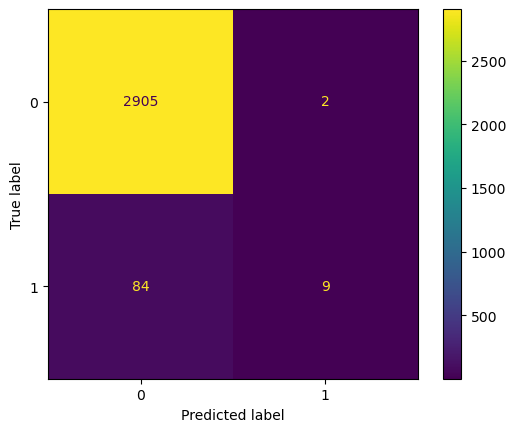

In [44]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
 
print("Accuracy for the model is:",accuracy_score(y_pred_lg,Y_test))
report_lg=classification_report(y_pred_lg,Y_test)
print(report_lg)
cm_lg = ConfusionMatrixDisplay.from_estimator(lg, X_test, Y_test)

In [45]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error (MSE)
lg_mse = mean_squared_error(Y_test, y_pred_lg)

# Print the scores
print("Logistic Regression MSE:", lg_mse)

Logistic Regression MSE: 0.028666666666666667


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print("Score for Train Model", dt.score(X_train, Y_train))
print("Score for Test Model", dt.score(X_test, Y_test))

Score for Train Model 1.0
Score for Test Model 0.9756666666666667


Accuracy for the model is: 0.9756666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2898
           1       0.66      0.60      0.63       102

    accuracy                           0.98      3000
   macro avg       0.82      0.79      0.81      3000
weighted avg       0.97      0.98      0.98      3000

Decision Tree MSE: 0.024333333333333332


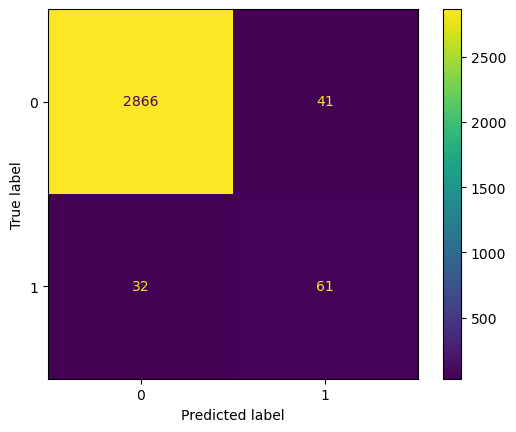

In [47]:
print("Accuracy for the model is:",accuracy_score(y_pred_dt,Y_test))
report_dt=classification_report(y_pred_dt,Y_test)
print(report_dt)
cm_dt = ConfusionMatrixDisplay.from_estimator(dt, X_test, Y_test)
dt_mse = mean_squared_error(Y_test, y_pred_dt)
print("Decision Tree MSE:", dt_mse)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train , Y_train)
y_pred_rfc = rfc.predict(X_test)
print("Score for Train Model", rfc.score(X_train, Y_train))
print("Score for Test Model", rfc.score(X_test, Y_test))

Score for Train Model 1.0
Score for Test Model 0.9846666666666667


Accuracy for the model is: 0.9846666666666667
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2941
           1       0.57      0.90      0.70        59

    accuracy                           0.98      3000
   macro avg       0.78      0.94      0.84      3000
weighted avg       0.99      0.98      0.99      3000

Random Forest MSE: 0.015333333333333332


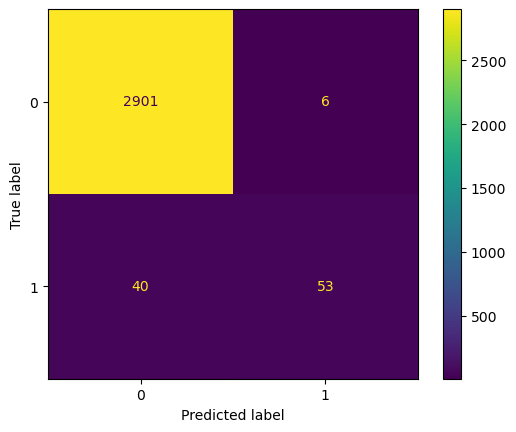

In [49]:
print("Accuracy for the model is:",accuracy_score(y_pred_rfc,Y_test))
report_rfc =classification_report(y_pred_rfc,Y_test)
print(report_rfc)
cm_rfc = ConfusionMatrixDisplay.from_estimator(rfc, X_test, Y_test)
rfc_mse = mean_squared_error(Y_test, y_pred_rfc)
print("Random Forest MSE:", rfc_mse)

In [50]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
y_pred_svc = svc.predict(X_test)
print("Score for Train Model", svc.score(X_train, Y_train))
print("Score for Test Model", svc.score(X_test, Y_test))

Score for Train Model 0.9712857142857143
Score for Test Model 0.9743333333333334


Accuracy for the model is: 0.9743333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2980
           1       0.19      0.90      0.32        20

    accuracy                           0.97      3000
   macro avg       0.60      0.94      0.65      3000
weighted avg       0.99      0.97      0.98      3000

Support Vector Classifier MSE: 0.025666666666666667


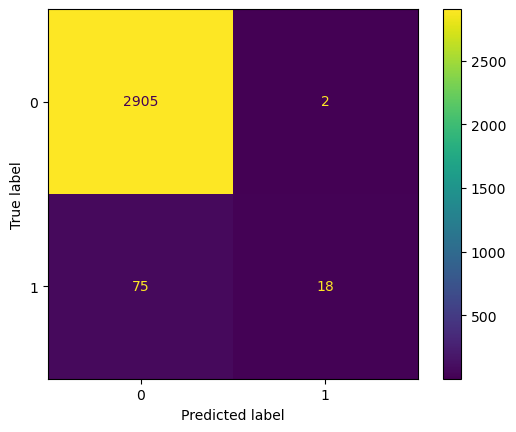

In [51]:
print("Accuracy for the model is:",accuracy_score(y_pred_svc,Y_test))
report_svc =classification_report(y_pred_svc,Y_test)
print(report_svc)
cm_svc = ConfusionMatrixDisplay.from_estimator(svc, X_test, Y_test)
svc_mse = mean_squared_error(Y_test, y_pred_svc)
print("Support Vector Classifier MSE:", svc_mse)

# Model Building using Dependent Variable as Failure Type

In [52]:
df2 = df.drop(['Target'], axis = 1)
df2.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,M,298.1,308.6,1551.0,42.8,0.0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,No Failure


In [53]:
X1 = df2.drop('Failure_Type', axis = 1)
Y1= df2['Failure_Type']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, random_state = 42, test_size = 0.3)

In [54]:
cat_cols1 = X1_train.select_dtypes(include = 'O').columns.tolist()
cat_cols1

['Type']

In [55]:
num_cols1 = X1_train.select_dtypes(exclude = 'O').columns.tolist()
num_cols1

['Air_temperature',
 'Process_temperature',
 'Rotational_speed',
 'Torque',
 'Tool_wear']

In [56]:
enc1 = OneHotEncoder(handle_unknown='ignore')
sc1 = StandardScaler()

ct1 = ColumnTransformer(
    [
        ('encoding' , enc1 , cat_cols1) ,
        ('scaling' , sc1 , num_cols1)
    ]
)

In [57]:
X1_train = ct1.fit_transform(X1_train)
X1_test = ct1.transform(X1_test)

In [58]:
lg1 = LogisticRegression()
lg1.fit(X1_train , Y1_train)
y_pred_lg1 = lg1.predict(X1_test)
print("Score for Train Model", lg1.score(X1_train, Y1_train))
print("Score for Test Model", lg1.score(X1_test, Y1_test))

Score for Train Model 0.9724285714285714
Score for Test Model 0.9716666666666667


Accuracy for the model is: 0.9716666666666667
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.35      0.73      0.47        11
              No Failure       1.00      0.98      0.99      2971
      Overstrain Failure       0.32      0.64      0.42        11
           Power Failure       0.06      0.29      0.11         7
         Random Failures       0.00      0.00      0.00         0
       Tool Wear Failure       0.00      0.00      0.00         0

                accuracy                           0.97      3000
               macro avg       0.29      0.44      0.33      3000
            weighted avg       0.99      0.97      0.98      3000



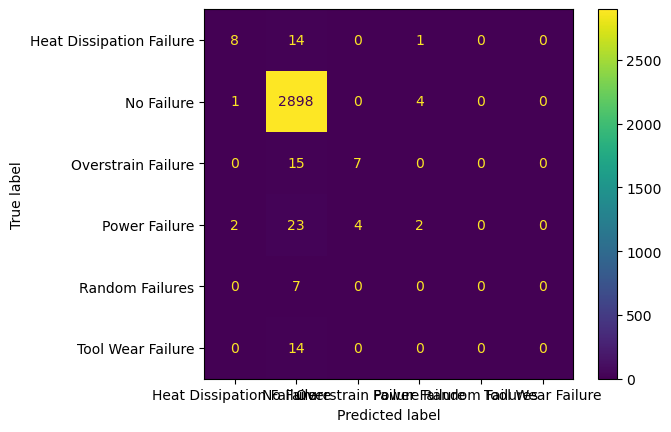

In [59]:
print("Accuracy for the model is:",accuracy_score(y_pred_lg1,Y1_test))
report_lg1=classification_report(y_pred_lg1,Y1_test)
print(report_lg1)
ConfusionMatrixDisplay.from_estimator(lg1, X1_test, Y1_test)

In [60]:
dt1=DecisionTreeClassifier()
dt1.fit(X1_train,Y1_train)
y_pred_dt1 = dt1.predict(X1_test)
print("Score for Train Model", dt1.score(X1_train, Y1_train))
print("Score for Test Model", dt1.score(X1_test, Y1_test))

Score for Train Model 1.0
Score for Test Model 0.9713333333333334


Accuracy for the model is: 0.9713333333333334
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.87      0.77      0.82        26
              No Failure       0.99      0.99      0.99      2896
      Overstrain Failure       0.41      0.47      0.44        19
           Power Failure       0.74      0.79      0.77        29
         Random Failures       0.00      0.00      0.00         9
       Tool Wear Failure       0.07      0.05      0.06        21

                accuracy                           0.97      3000
               macro avg       0.51      0.51      0.51      3000
            weighted avg       0.97      0.97      0.97      3000



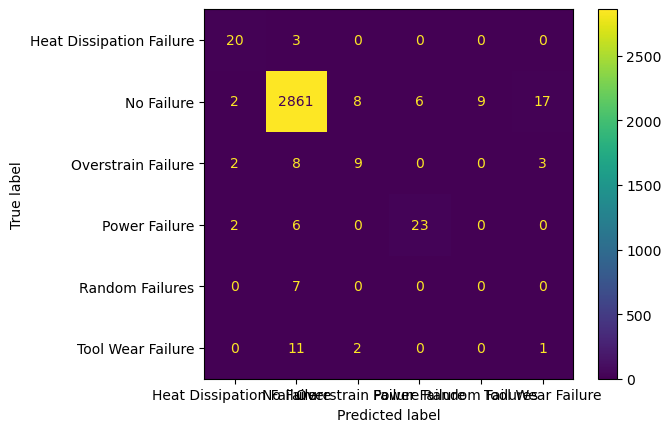

In [61]:
print("Accuracy for the model is:",accuracy_score(y_pred_dt1,Y1_test))
report_dt1 = classification_report(y_pred_dt1,Y1_test)
print(report_dt1)
cm_dt1 = ConfusionMatrixDisplay.from_estimator(dt1, X1_test, Y1_test)

In [62]:
rfc1 = RandomForestClassifier()
rfc1.fit(X1_train , Y1_train)
y_pred_rfc1 = rfc1.predict(X1_test)
print("Score for Train Model", rfc1.score(X1_train, Y1_train))
print("Score for Test Model", rfc1.score(X1_test, Y1_test))

Score for Train Model 1.0
Score for Test Model 0.9816666666666667


Accuracy for the model is: 0.9816666666666667
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.65      0.88      0.75        17
              No Failure       1.00      0.98      0.99      2948
      Overstrain Failure       0.45      1.00      0.62        10
           Power Failure       0.71      0.88      0.79        25
         Random Failures       0.00      0.00      0.00         0
       Tool Wear Failure       0.00      0.00      0.00         0

                accuracy                           0.98      3000
               macro avg       0.47      0.62      0.53      3000
            weighted avg       0.99      0.98      0.99      3000



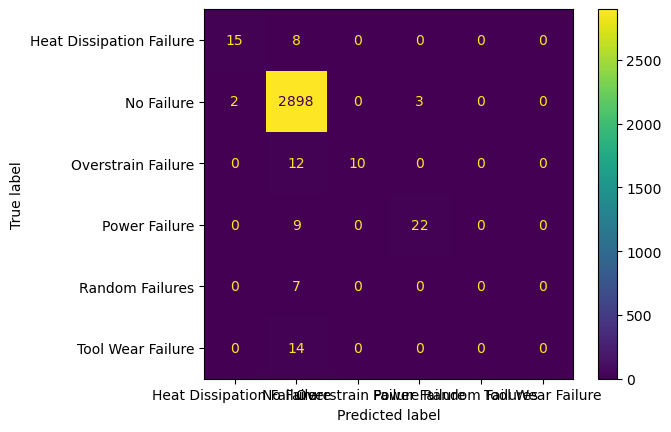

In [63]:
print("Accuracy for the model is:",accuracy_score(y_pred_rfc1,Y1_test))
report_rfc1 =classification_report(y_pred_rfc1,Y1_test)
print(report_rfc1)
cm_rfc1 = ConfusionMatrixDisplay.from_estimator(rfc1, X1_test, Y1_test)

In [64]:
svc1 = SVC()
svc1.fit(X1_train,Y1_train)
y_pred_svc1 = svc1.predict(X1_test)
print("Score for Train Model", svc1.score(X1_train, Y1_train))
print("Score for Test Model", svc1.score(X1_test, Y1_test))

Score for Train Model 0.971
Score for Test Model 0.972


Accuracy for the model is: 0.972
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.04      1.00      0.08         1
              No Failure       1.00      0.97      0.99      2983
      Overstrain Failure       0.27      0.60      0.37        10
           Power Failure       0.19      1.00      0.32         6
         Random Failures       0.00      0.00      0.00         0
       Tool Wear Failure       0.00      0.00      0.00         0

                accuracy                           0.97      3000
               macro avg       0.25      0.60      0.29      3000
            weighted avg       1.00      0.97      0.98      3000



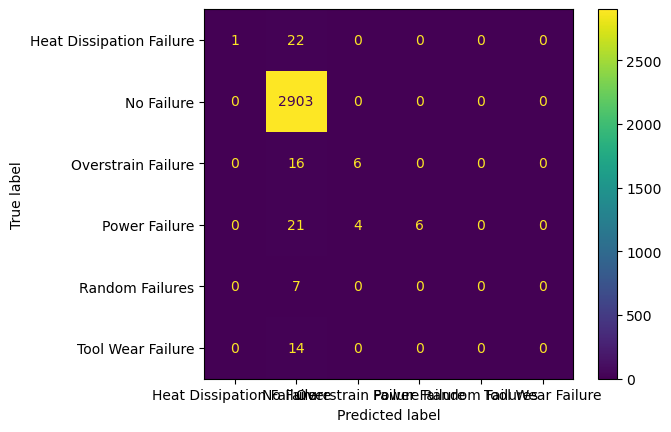

In [65]:
print("Accuracy for the model is:",accuracy_score(y_pred_svc1,Y1_test))
report_svc1 =classification_report(y_pred_svc1,Y1_test)
print(report_svc1)
cm_svc1 = ConfusionMatrixDisplay.from_estimator(svc1, X1_test, Y1_test)